#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

*  Update the Stop Resolution column to either be arrested (1) or not arrested (0):
*  Change the date column to datetime so we can work with it. Add in the month as a new column:
*  Group weapons into firearms vs. non-firearms vs. no weapon:
*  Change Officer year of bith to give the officer age:
*  Drop columns that we are not going to need:

* Converting categorical data to numeric format through label encoder

i) Loading Libraries -> 
ii) Loading data -> 
iii) Descriptive Exploration -> 
iv) Data Cleaning -> 
v) Exploratory Descriptive Analysis (EDA) -> 
vi) Pre-processing Data

### 4.1. Loading Libraries

In [2]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 4.2. Loading Data

In [3]:
# read the csv file to pandas data frame
Tery_stops_df = pd.read_csv("data/Terry_Stops.csv")

# preview the first 3 rows
Tery_stops_df.tail(7)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
54866,26 - 35,-1,20180000000919,398370,Field Contact,None,7456,1979,M,White,...,18:34:00.0000000,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,N,-,-,-
54867,-,-1,20150000287206,74691,Offense Report,None,7539,1963,M,White,...,04:22:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--PROWLER - TRESPASS,ONVIEW,EAST PCT 1ST W - EDWARD (CHARLIE),N,N,East,E,E2
54868,26 - 35,-1,20150000209583,80805,Offense Report,None,7627,1987,M,Asian,...,22:44:00.0000000,-,-,-,WEST PCT 3RD W - D/M RELIEF,N,N,West,M,M1
54869,26 - 35,-1,20170000192339,270598,Offense Report,None,7649,1986,M,White,...,16:59:00.0000000,"ANIMAL - INJURED, DEAD HAZARD, OTHER","--ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS",911,SOUTH PCT 2ND W - R/S RELIEF,N,N,South,R,R1
54870,18 - 25,27472770027,20210000246095,27472791353,Arrest,Knife/Cutting/Stabbing Instrument,8360,1983,M,White,...,19:15:40.0000000,ASLT - IP/JO - PERSON SHOT OR SHOT AT,"--WEAPON, PERSON WITH - GUN",911,NaN,Y,Y,East,E,E2
54871,26 - 35,9638182595,20190000291250,9638493031,Offense Report,Knife/Cutting/Stabbing Instrument,8547,1964,M,White,...,01:32:28.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NaN,N,Y,North,U,U1
54872,18 - 25,-1,20180000389639,492976,Offense Report,None,8581,1969,M,Two or More Races,...,06:04:00.0000000,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),"DISTURBANCE, MISCELLANEOUS/OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,North,L,L3


#### These are the  23 columns, with a concise explanation of the information contained in each column :

**Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.

**Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID:** Key identifying unique Terry Stop reports.

**Stop Resolution:** Resolution of the stop as reported by the officer.

**Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID:** Key identifying unique officers in the dataset.

**Officer YOB:** Year of birth, as reported by the officer.

**Officer Gender:** Gender of the officer, as reported by the officer.

**Officer Race:** Race of the officer, as reported by the officer.

**Subject Perceived Race:** Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.

**Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type:** Initial classification of the call as assigned by 911.

**Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.

**Call Type:** How the call was received by the communication center.

**Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.




### 4.3.  Descriptive Exploration
To summarizes the characteristics of a data set

In [4]:
# data shape
print(f"This dataset has {Tery_stops_df.shape[0]} rows and {Tery_stops_df.shape[1]} columns")

This dataset has 54873 rows and 23 columns


#### 4.3.1.  What are the datatype of columns ?

In [5]:
# # check number of categorical and numerical columns
def columns_dtypes(df):
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    
# call the function  
columns_dtypes(Tery_stops_df)

Numerical columns: 4
Categorical columns: 19


#### 4.3.2. Data set description

In [6]:
# describe the dataset
Tery_stops_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject ID,54873.0,4.733982e+09,8.203096e+09,-8.0,-1.000000e+00,-1.000000e+00,7.732994e+09,4.149222e+10
GO / SC Num,54873.0,2.018135e+13,8.883140e+10,-1.0,2.016000e+13,2.018000e+13,2.020000e+13,2.023000e+13
Terry Stop ID,54873.0,7.648965e+09,1.171084e+10,28020.0,2.123010e+05,4.677610e+05,1.279593e+10,4.149624e+10
Officer YOB,54873.0,1.983519e+03,9.508902e+00,1900.0,1.979000e+03,1.986000e+03,1.990000e+03,2.000000e+03


>Most of the figures are too large to give a clear description but this before any scaling.

#### 4.3.3 Target column distribution


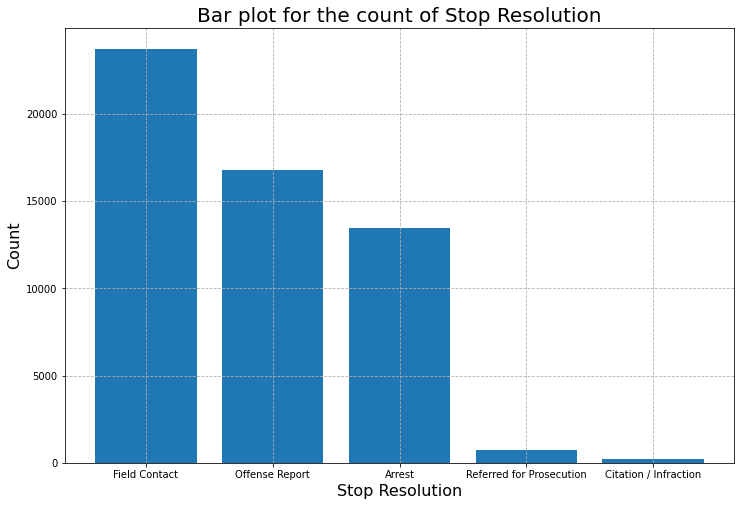

In [7]:
def plot_value_counts(df, col_name):
    # Count the number of unique values for the column "Stop Resolution"
    value_counts = df[col_name].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12,8))
    plt.bar(value_counts.index, value_counts.values)
    
    
    # Label the x and y axis
    plt.title("Bar plot for the count of " + col_name, fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)

    # Add grid
    plt.grid(True, linestyle='--')
    
    # Show the plot
    plt.show()

# call the function    
plot_value_counts(Tery_stops_df,"Stop Resolution")

>Field contact dominated the stop resolution as repoted by officer

#### 4.3.4 Categorical Columns

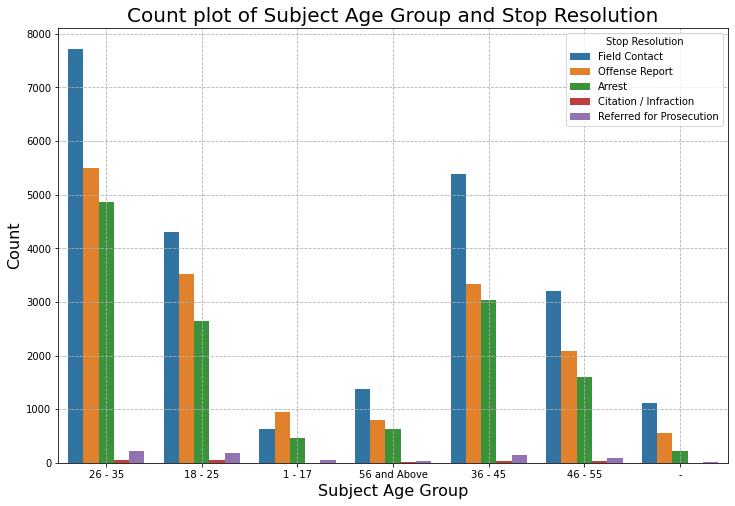

In [8]:
# function to describe categorical columns
def count_plot(df, x_col, y_col):
    # Plot the count plot
    plt.figure(figsize=(12,8))
    sns.countplot(x=x_col, hue=y_col, data=df)

    # Label the x and y axis
    plt.title("Count plot of " + x_col + " and " + y_col, fontsize=20)
    plt.xlabel(x_col, fontsize=16)
    plt.ylabel("Count", fontsize=16)

    # Add grid
    plt.grid(True, linestyle='--')
    
    # Show the plot
    plt.show()

# call the function 
count_plot(Tery_stops_df, "Subject Age Group", "Stop Resolution" )

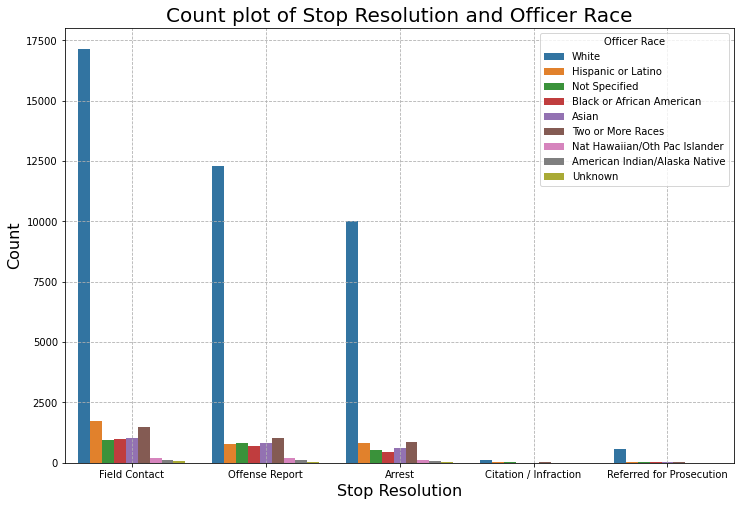

In [9]:
count_plot(Tery_stops_df, "Stop Resolution","Officer Race")

### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

In [10]:
# check to see type of data
Tery_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         54873 non-null  object
 1   Subject ID                54873 non-null  int64 
 2   GO / SC Num               54873 non-null  int64 
 3   Terry Stop ID             54873 non-null  int64 
 4   Stop Resolution           54873 non-null  object
 5   Weapon Type               54873 non-null  object
 6   Officer ID                54873 non-null  object
 7   Officer YOB               54873 non-null  int64 
 8   Officer Gender            54873 non-null  object
 9   Officer Race              54873 non-null  object
 10  Subject Perceived Race    54873 non-null  object
 11  Subject Perceived Gender  54873 non-null  object
 12  Reported Date             54873 non-null  object
 13  Reported Time             54873 non-null  object
 14  Initial Call Type     

In [11]:
# call the function  
print("Summary:")
columns_dtypes(Tery_stops_df)

Summary:
Numerical columns: 4
Categorical columns: 19


#### 4.4.1. Missing and Duplicate Values
 a function to check duplicates and null

In [12]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with null count of")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

check_duplicates_missing(Tery_stops_df)


Officer squad is the column with null count of

No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.00,0,0.0
Subject ID,0.00,0,0.0
GO / SC Num,0.00,0,0.0
Terry Stop ID,0.00,0,0.0
Stop Resolution,0.00,0,0.0
Weapon Type,0.00,0,0.0
Officer ID,0.00,0,0.0
Officer YOB,0.00,0,0.0
Officer Gender,0.00,0,0.0
Officer Race,0.00,0,0.0


#### 4.4.1.1. Investigate the null values

In [13]:
# check the missing column
squad_df = Tery_stops_df["Officer Squad"].value_counts().rename_axis('unique_values').reset_index(name='counts')
squad_df.tail(7)

,unique_values,counts
146,ROBBERY SQUAD B,1
147,ZOLD CRIME ANALYSIS UNIT - ANALYSTS,1
148,HUMAN TRAFFICKING - SQUAD A,1
149,COMMUNITY OUTREACH - SPECIAL PROJECTS DETAIL,1
150,ROBBERY SQUAD A,1
151,DV SQUAD C - ELDER ABUSE,1
152,COMMUNITY OUTREACH - YOUTH VIOLENCE -SCHOOLS D...,1


In [14]:
# count the number of stop resolutions by squad
print("Missing informaion vs the squad of the officer:")
squad_counts = Tery_stops_df.groupby("Officer Squad")["Stop Resolution"].value_counts().unstack()
squad_counts

Missing informaion vs the squad of the officer:


Stop Resolution,Arrest,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution
Officer Squad,,,,,
ALTERNATIVE RESPONSE TEAM (ART) - SQUAD A,NaN,NaN,NaN,1.0,NaN
ALTERNATIVE RESPONSE TEAM (ART) - SQUAD B,NaN,NaN,NaN,1.0,NaN
AUTO THEFT,2.0,NaN,1.0,1.0,NaN
BURG/THEFT/JUV - EAST,NaN,NaN,1.0,4.0,NaN
BURG/THEFT/JUV - NORTH,NaN,NaN,2.0,1.0,NaN
...,...,...,...,...,...
WEST PCT OPS - BURG/THEFT,NaN,NaN,NaN,3.0,NaN
WEST PCT OPS - CPT,6.0,NaN,13.0,33.0,NaN
WEST PCT OPS - MOUNTED PATROL,2.0,NaN,4.0,2.0,1.0


##### compare officer ID vs the missing information

In [15]:
#get the null dataframe
null_data = Tery_stops_df[Tery_stops_df.isnull().any(axis=1)]


In [16]:
# group the data by Officer ID
grouped = null_data.groupby('Officer ID')

# count the number of missing values in each group
missing_counts = grouped.apply(lambda x: x.isnull().sum())

# get the columns with missing values
missing_columns = missing_counts.columns[missing_counts.sum() > 0]

# create a new dataframe with the missing counts for each Officer ID
missing_df = missing_counts[missing_columns].reset_index()

# rename the columns for clarity
missing_df.columns = ['Officer ID', 'Missing Count']

# compare the number of missing values for each Officer ID
missing_df.sort_values(by='Missing Count', ascending=False).head(7)


,Officer ID,Missing Count
713,8646,314
238,7456,197
714,8647,188
754,8689,184
758,8696,182
745,8680,173
749,8684,142


In [17]:
# # call count plot functions
# count_plot(missing_df, "Officer ID", "Missing Count")

#### What was the outcome of the stops with missing information?.

In [18]:
# group the data by Officer ID and Stop Resolution
grouped = null_data.groupby(["Officer ID", "Stop Resolution"]).size().reset_index(name="Count")

# preview
grouped.head(5)

,Officer ID,Stop Resolution,Count
0,-,Arrest,3
1,-,Field Contact,19
2,-,Offense Report,2
3,-9,Arrest,1
4,-9,Field Contact,4


#### 4.4.1.2. Handling Null
>I will drop the Officer Squad column because the null values equals to **37.78%**  and the information it contains I will not use for my analysis.

In [19]:
# drop the Officer Squad column
No_null_df = Tery_stops_df.drop(["Officer Squad"], axis=1)

# check to confirm id data still has missing values 
check_duplicates_missing(No_null_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.0,0,0.0
Subject ID,0.0,0,0.0
GO / SC Num,0.0,0,0.0
Terry Stop ID,0.0,0,0.0
Stop Resolution,0.0,0,0.0
Weapon Type,0.0,0,0.0
Officer ID,0.0,0,0.0
Officer YOB,0.0,0,0.0
Officer Gender,0.0,0,0.0
Officer Race,0.0,0,0.0


>Data all good the null values handled

#### 4.4.2. Correcting Data Format
This are the steps taken in correcting data format:
* Update the Stop Resolution column to either be arrested (1) or not arrested (0)
* Change the date column to datetime
* Group weapons into firearms vs. non-firearms vs. no weapon:
* Change Officer year of bith to give the officer age
* To categorize this time as either "daytime" or "nighttime"
* Drop columns that we are not going to need
* Converting categorical data to numeric format through label encoder

##### * Fix structural error

In [20]:
# replace with new stings
No_null_df = No_null_df.replace(["-"], "No Information")
No_null_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,2016-10-31T00:00:00Z,01:23:00.0000000,No Information,No Information,No Information,N,N,No Information,No Information,No Information
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,2018-09-22T00:00:00Z,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,2017-10-27T00:00:00Z,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,N,N,East,C,C1


##### * Update the Stop Resolution column to binary

In [21]:
# get unique values in stop resolution
stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"before:\n{stop_resolution_unique}")

# update to binary the colum values
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']
conversion_dict = {val: 1 if val == 'Arrest' else 0 for val in values}

# update column in data frame
No_null_df["Stop Resolution"] = No_null_df["Stop Resolution"].map(conversion_dict)
print()
# check data type after update
new_stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"after:\n{new_stop_resolution_unique}")

before:
{'Arrest', 'Offense Report', 'Field Contact', 'Referred for Prosecution', 'Citation / Infraction'}

after:
{0, 1}


##### * Change the Reported Date column from object to datetime .

The data description, Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day.
Convert to date time so that I checked how different days and years affected the targert column

In [22]:
# convert to datetime type
No_null_df['Reported Date'] = pd.to_datetime(No_null_df['Reported Date'])

# extract day
No_null_df['Day'] = No_null_df['Reported Date'].dt.day
# extract year
No_null_df['Year'] = No_null_df['Reported Date'].dt.year

#
No_null_df['Month'] = No_null_df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})


>There are columns for the day, month and year for each of the Terry-stops in te datammset

##### * Group weapons

##### What is a firearm?

>The general classification of firearms can be based on the following criteria: Level of harm they produce. Lethal - designed with the intent to eventually kill the target. Non-lethal - designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

This column shwed a list of the type weapons if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

In [23]:
# gets weapons category
weapons = list(dict(No_null_df['Weapon Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'No Information',
 'Lethal Cutting Instrument',
 'Knife/Cutting/Stabbing Instrument',
 'Handgun',
 'Blunt Object/Striking Implement',
 'Firearm Other',
 'Firearm',
 'Club, Blackjack, Brass Knuckles',
 'Other Firearm',
 'Mace/Pepper Spray',
 'Firearm (unk type)',
 'Taser/Stun Gun',
 'None/Not Applicable',
 'Fire/Incendiary Device',
 'Club',
 'Rifle',
 'Shotgun',
 'Automatic Handgun',
 'Personal Weapons (hands, feet, etc.)',
 'Brass Knuckles',
 'Blackjack']

I will convert the firearm category to binary, it will be Firearm is designed with the intent to eventually kill the target and Non Firearm if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries. 

In [24]:
# map the new values to the weapon found column
No_null_df['Weapon Type'] = No_null_df['Weapon Type'].map(
{
 'None': 'Non Firearm',
 '-': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Knife/Cutting/Stabbing Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Blunt Object/Striking Implement': 'Non Firearm',
 'Firearm Other': 'Firearm',
 'Firearm': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'Other Firearm': 'Firearm',
 'Mace/Pepper Spray': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Taser/Stun Gun': 'Non Firearm',
 'None/Not Applicable': 'Non Firearm',
 'Fire/Incendiary Device': 'Non Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Automatic Handgun': 'Firearm',
 'Personal Weapons (hands, feet, etc.)': 'Non Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
 })

Most of the weapons were classified as Non Firearm

##### * Get  officer age using YOB

In [25]:
# get age by subtracting from current year 
No_null_df['Officer Age'] = 2023 - No_null_df["Officer YOB"]

# preview
No_null_df[["Stop Resolution", "Officer Age"]].tail(7)

,Stop Resolution,Officer Age
54866,0,44
54867,0,60
54868,0,36
54869,0,37
54870,1,40
54871,0,59
54872,0,54


##### * Convert time to binary

In [26]:
# function to split time column and extract hour and group as night or dat
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

No_null_df["Time Category"] = categorize_time(No_null_df["Reported Time"])    

##### Drop irrelevant columns

In [54]:
# columns to be dropped
irrelevant_columns = [
    'Subject ID',
    'GO / SC Num',
    'Terry Stop ID',
    'Officer YOB',
    'Reported Date',
    'Officer ID',
    'Officer Gender',
    'Officer Race',
    'Subject Perceived Race',
    'Subject Perceived Gender',
    'Reported Time',
    'Final Call Type',
    'Call Type',
    'Initial Call Type',
    'Officer YOB',
    'Day'
    
]

df = No_null_df.drop(irrelevant_columns, axis=1)
df.head(3)

,Subject Age Group,Stop Resolution,Weapon Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Year,Month,Officer Age,Time Category
0,26 - 35,0,Non Firearm,N,N,No Information,No Information,No Information,2016,October,55,Night
1,18 - 25,0,Non Firearm,N,N,North,L,L2,2018,September,32,Day
2,26 - 35,0,Non Firearm,N,N,East,C,C1,2017,October,31,Day


## 4.5. Exploratory Data Analysis

The dataset has an additional columns, during data processing I feature engineered columns to help in better understanding of any underlying patterns that would help make better predictions.

There are some columns that I will not use in my analysis and I drop the at this point, part of  final preparation before modelling.I'd like to point out that I'll be removing the subject's race and gender because these are only perceived by the officer and thus their accuracy cannot be trusted.

In [55]:
df.columns

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Arrest Flag',
       'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Year', 'Month',
       'Officer Age', 'Time Category'],
      dtype='object')

In [56]:
# numerical columns
num_cols = df.select_dtypes(include= np.number)

# categorical columns
cat_cols = df.select_dtypes(include= 'object')


##### Categorical vs target colum

##### Distribution of the data

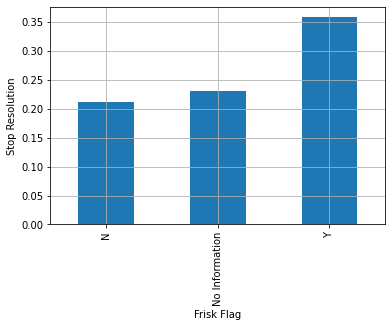

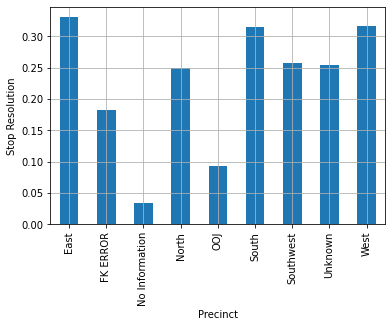

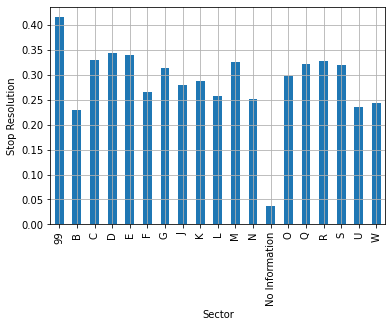

In [43]:
# check for categorical vs the target
df = No_null_df

# plot the relationship between Frisk Flag and the outcome
df.groupby(['Frisk Flag'])['Stop Resolution'].mean().plot(kind='bar')
plt.xlabel('Frisk Flag')
plt.ylabel('Stop Resolution')
plt.show()

# plot the relationship between Precinct and the outcome
df.groupby(['Precinct'])['Stop Resolution'].mean().plot(kind='bar')
plt.xlabel('Precinct')
plt.ylabel('Stop Resolution')
plt.show()

# plot the relationship between Sector and the outcome
df.groupby(['Sector'])['Stop Resolution'].mean().plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Stop Resolution')
plt.show()



##### Correlation with the Target colum

In [44]:
df.corr()

,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Officer YOB,Day,Year,Officer Age
Subject ID,1.000000,0.167929,0.775904,0.015912,0.199312,-0.006923,0.696167,-0.199312
GO / SC Num,0.167929,1.000000,0.203768,0.008982,0.072678,-0.005639,0.237795,-0.072678
Terry Stop ID,0.775904,0.203768,1.000000,0.002033,0.245615,-0.010973,0.859731,-0.245615
Stop Resolution,0.015912,0.008982,0.002033,1.000000,0.071512,0.012033,0.031297,-0.071512
Officer YOB,0.199312,0.072678,0.245615,0.071512,1.000000,0.000794,0.298208,-1.000000
Day,-0.006923,-0.005639,-0.010973,0.012033,0.000794,1.000000,-0.018727,-0.000794
Year,0.696167,0.237795,0.859731,0.031297,0.298208,-0.018727,1.000000,-0.298208
Officer Age,-0.199312,-0.072678,-0.245615,-0.071512,-1.000000,-0.000794,-0.298208,1.000000


# 5.0. Modelling

>Is this a classification task? 
What models will we try?
How do we deal with overfitting?
Do we need to use regularization or not?
What sort of validation strategy will we be using to check that our model works well on unseen data?
What loss functions will we use?
What threshold of performance do we consider as successful?

In [ ]:
columns_dtypes(Tery_stops_df)

In [ ]:
def visualize_outliers_zscore(df, threshold=3):
    plt.rcParams["axes.grid"] = True
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in numerical_cols:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = (df[col] - mean) / std
        outliers = df[np.abs(z_scores) > threshold]

        fig, ax = plt.subplots(figsize=(10, 6))
        sns.boxenplot(df[col], ax=ax)
        ax.scatter(x=outliers.index, y=outliers[col], color='red', s=50)
        ax.set_title(f"Outliers in {col.title()}")
        ax.set_xlabel(col)
        plt.show()

visualize_outliers_zscore(DataOne)   